In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("orders_A1.xlsx")
df

OrderId  StoreId              CustomerId OrderStatusId PaymentStatusId  \
0       3459.0      5.0                43017481            30              30   
1          NaN      NaN                     Sku  PriceExclTax    PriceInclTax   
2          NaN      NaN  CAPRE-00004-00077-D2-1         13.49         15.2437   
3       3458.0      5.0                43017481            30              30   
4          NaN      NaN                     Sku  PriceExclTax    PriceInclTax   
...        ...      ...                     ...           ...             ...   
12718      NaN      NaN        CARE-00004-00015         11.29         12.7577   
12719     33.0      4.0                    5209            30              10   
12720      NaN      NaN                     Sku  PriceExclTax    PriceInclTax   
12721      NaN      NaN        CARE-00004-00015         11.29         12.7577   
12722      NaN      NaN        CARE-00004-00008          7.34          8.2942   

      ShippingStatusId OrderSubtotalInclTax OrderSubtotalExclTax  \
0                   20                15.24                13.49   
1             Quantity      DiscountExclTax      DiscountInclTax   
2                    1                    0                    0   
3                   20                 15.8                13.98   
4             Quantity      DiscountExclTax      DiscountInclTax   
...                ...                  ...                  ...   
12718                1                    0                    0   
12719               20                21.05                18.63   
12720         Quantity      DiscountExclTax      DiscountInclTax   
12721                1                    0                    0   
12722                1                    0                    0   

      OrderSubTotalDiscountInclTax OrderSubTotalDiscountExclTax  ...  \
0                                0                            0  ...   
1                     TotalExclTax                 TotalInclTax  ...   
2                            13.49                      15.2437  ...   
3                                0                            0  ...   
4                     TotalExclTax                 TotalInclTax  ...   
...                            ...                          ...  ...   
12718                        11.29                      12.7577  ...   
12719                            0                            0  ...   
12720                 TotalExclTax                 TotalInclTax  ...   
12721                        11.29                      12.7577  ...   
12722                         7.34                       8.2942  ...   

       BillingCountry  BillingStateProvince  BillingCounty  BillingCity  \
0              Canada               Ontario            NaN    Cambridge   
1                 NaN                   NaN            NaN          NaN   
2                 NaN                   NaN            NaN          NaN   
3              Canada               Ontario            NaN    Cambridge   
4                 NaN                   NaN            NaN          NaN   
...               ...                   ...            ...          ...   
12718             NaN                   NaN            NaN          NaN   
12719             NaN                   NaN            NaN    Cambridge   
12720             NaN                   NaN            NaN          NaN   
12721             NaN                   NaN            NaN          NaN   
12722             NaN                   NaN            NaN          NaN   

      BillingZipPostalCode  BillingFaxNumber  ShippingCountry  \
0                  N1S 3V7               NaN           Canada   
1                      NaN               NaN              NaN   
2                      NaN               NaN              NaN   
3                  N1S 3V7               NaN           Canada   
4                      NaN               NaN              NaN   
...                    ...               ...              ...

In [3]:
df.isna().sum()

OrderId                                     9439
StoreId                                     9439
CustomerId                                     0
OrderStatusId                                  0
PaymentStatusId                                0
ShippingStatusId                               0
OrderSubtotalInclTax                           0
OrderSubtotalExclTax                           0
OrderSubTotalDiscountInclTax                   0
OrderSubTotalDiscountExclTax                   0
OrderShippingInclTax                        9439
OrderShippingExclTax                        9439
PaymentMethodAdditionalFeeInclTax           9439
PaymentMethodAdditionalFeeExclTax           9439
TaxRates                                    9439
OrderTax                                    9439
OrderTotal                                  9439
RefundedAmount                              9439
OrderDiscount                               9439
CurrencyRate                                9439
CustomerCurrencyCode

* the format of transaction details is convinient to view in excel, but not for our pandas dataframe. it is just making null values. so let us handle it first by seperating them into different data frames. 

In [4]:
column_names = ["OrderId","Sku", "PriceExclTax", "PriceInclTax","Quantity","DiscountExclTax","DiscountInclTax","TotalExclTax","TotalInclTax"]
product_details_df = pd.DataFrame(columns=column_names)
product_details_df

Empty DataFrame
Columns: [OrderId, Sku, PriceExclTax, PriceInclTax, Quantity, DiscountExclTax, DiscountInclTax, TotalExclTax, TotalInclTax]
Index: []

In [6]:
for index, row in df.iterrows():
    if pd.isna(row["OrderId"]):
        if row["CustomerId"]=="Sku":
            df = df.drop(index)
            continue
        product_detail = {
            "OrderId": current_OrderId,
            "Sku": row["CustomerId"],
            "PriceExclTax": row["OrderStatusId"],
            "PriceInclTax": row["PaymentStatusId"],
            "Quantity": row["ShippingStatusId"],
            "DiscountExclTax": row["OrderSubtotalInclTax"],
            "DiscountInclTax": row["OrderSubtotalExclTax"],
            "TotalExclTax": row["OrderSubTotalDiscountInclTax"],
            "TotalInclTax": row["OrderSubTotalDiscountExclTax"],
        }
        product_details_df = product_details_df.concat(product_detail,ignore_index=True)
        df = df.drop(index)
        
    else :
        current_OrderId = row["OrderId"]
product_details_df

OrderId                     Sku  PriceExclTax  PriceInclTax Quantity  \
0      3459.0  CAPRE-00004-00077-D2-1         13.49       15.2437        1   
1      3458.0  CAPRE-00004-00065-D2-1         13.98       15.7974        1   
2      3457.0  CAPRE-00004-00056-D2-1         19.11       21.5943        2   
3      3456.0       CAPRE-00004-00052         13.59       15.3567        1   
4      3456.0       CAPRE-00004-00053          9.42       10.6446        1   
...       ...                     ...           ...           ...      ...   
6151     45.0        CARE-00004-00015         11.29       12.7577        1   
6152     45.0        CARE-00004-00017          1.31        1.4803        2   
6153     41.0        CARE-00004-00015         11.29       12.7577        1   
6154     33.0        CARE-00004-00015         11.29       12.7577        1   
6155     33.0        CARE-00004-00008          7.34        8.2942        1   

     DiscountExclTax DiscountInclTax  TotalExclTax  TotalInclTax  
0                  0               0         13.49       15.2437  
1                  0               0         13.98       15.7974  
2                  0               0         38.22       43.1886  
3                  0               0         13.59       15.3567  
4                  0               0          9.42       10.6446  
...              ...             ...           ...           ...  
6151               0               0         11.29       12.7577  
6152               0               0          2.62        2.9606  
6153               0               0         11.29       12.7577  
6154               0               0         11.29       12.7577  
6155               0               0          7.34        8.2942  

[6156 rows x 9 columns]

In [7]:
product_details_df.isna().sum()

OrderId            0
Sku                0
PriceExclTax       0
PriceInclTax       0
Quantity           0
DiscountExclTax    0
DiscountInclTax    0
TotalExclTax       0
TotalInclTax       0
dtype: int64

In [8]:
df

OrderId  StoreId CustomerId OrderStatusId PaymentStatusId  \
0       3459.0      5.0   43017481            30              30   
3       3458.0      5.0   43017481            30              30   
6       3457.0      5.0    7934570            30              30   
9       3456.0     15.0   42958451            30              30   
19      3455.0     15.0   42957266            30              30   
...        ...      ...        ...           ...             ...   
12706     49.0      4.0       5209            30              10   
12709     46.0      4.0       5209            30              30   
12712     45.0      4.0       5209            30              30   
12716     41.0      4.0       5209            30              30   
12719     33.0      4.0       5209            30              10   

      ShippingStatusId OrderSubtotalInclTax OrderSubtotalExclTax  \
0                   20                15.24                13.49   
3                   20                 15.8                13.98   
6                   20                43.19                38.22   
9                   20               115.18               101.93   
19                  20                46.49                41.37   
...                ...                  ...                  ...   
12706               20                12.76                11.29   
12709               20                12.76                11.29   
12712               20                15.72                13.91   
12716               20                12.76                11.29   
12719               20                21.05                18.63   

      OrderSubTotalDiscountInclTax OrderSubTotalDiscountExclTax  ...  \
0                                0                            0  ...   
3                                0                            0  ...   
6                                0                            0  ...   
9                                0                            0  ...   
19                               0                            0  ...   
...                            ...                          ...  ...   
12706                            0                            0  ...   
12709                            0                            0  ...   
12712                            0                            0  ...   
12716                            0                            0  ...   
12719                            0                            0  ...   

       BillingCountry  BillingStateProvince  BillingCounty  BillingCity  \
0              Canada               Ontario            NaN    Cambridge   
3              Canada               Ontario            NaN    Cambridge   
6              Canada               Ontario            NaN          Ayr   
9              Canada               Ontario            NaN    Brantford   
19             Canada               Ontario            NaN    Brantford   
...               ...                   ...            ...          ...   
12706          Canada               Ontario            NaN    Cambridge   
12709          Canada               Ontario            NaN    Cambridge   
12712          Canada               Ontario            NaN    Cambridge   
12716          Canada               Ontario            NaN    Cambridge   
12719             NaN                   NaN            NaN    Cambridge   

      BillingZipPostalCode  BillingFaxNumber  ShippingCountry  \
0                  N1S 3V7               NaN           Canada   
3                  N1S 3V7               NaN           Canada   
6                  N0B 1E0               NaN           Canada   
9                  N3R 2G5               NaN              NaN   
19                 N3R 8A9               NaN              NaN   
...                    ...               ...              ...   
12706               N1R5s5               NaN           Canada   
12709               N1R5s5               NaN           Canada   
12712               N1

In [9]:
df.isna().sum()

OrderId                                       0
StoreId                                       0
CustomerId                                    0
OrderStatusId                                 0
PaymentStatusId                               0
ShippingStatusId                              0
OrderSubtotalInclTax                          0
OrderSubtotalExclTax                          0
OrderSubTotalDiscountInclTax                  0
OrderSubTotalDiscountExclTax                  0
OrderShippingInclTax                          0
OrderShippingExclTax                          0
PaymentMethodAdditionalFeeInclTax             0
PaymentMethodAdditionalFeeExclTax             0
TaxRates                                      0
OrderTax                                      0
OrderTotal                                    0
RefundedAmount                                0
OrderDiscount                                 0
CurrencyRate                                  0
CustomerCurrencyCode                    

* We have reduced most of the null values in our data frame. but still there are few left. let us observe closely about them 

In [10]:
df[df.isnull().any(axis=1)]

OrderId  StoreId CustomerId OrderStatusId PaymentStatusId  \
0       3459.0      5.0   43017481            30              30   
3       3458.0      5.0   43017481            30              30   
6       3457.0      5.0    7934570            30              30   
9       3456.0     15.0   42958451            30              30   
19      3455.0     15.0   42957266            30              30   
...        ...      ...        ...           ...             ...   
12706     49.0      4.0       5209            30              10   
12709     46.0      4.0       5209            30              30   
12712     45.0      4.0       5209            30              30   
12716     41.0      4.0       5209            30              30   
12719     33.0      4.0       5209            30              10   

      ShippingStatusId OrderSubtotalInclTax OrderSubtotalExclTax  \
0                   20                15.24                13.49   
3                   20                 15.8                13.98   
6                   20                43.19                38.22   
9                   20               115.18               101.93   
19                  20                46.49                41.37   
...                ...                  ...                  ...   
12706               20                12.76                11.29   
12709               20                12.76                11.29   
12712               20                15.72                13.91   
12716               20                12.76                11.29   
12719               20                21.05                18.63   

      OrderSubTotalDiscountInclTax OrderSubTotalDiscountExclTax  ...  \
0                                0                            0  ...   
3                                0                            0  ...   
6                                0                            0  ...   
9                                0                            0  ...   
19                               0                            0  ...   
...                            ...                          ...  ...   
12706                            0                            0  ...   
12709                            0                            0  ...   
12712                            0                            0  ...   
12716                            0                            0  ...   
12719                            0                            0  ...   

       BillingCountry  BillingStateProvince  BillingCounty  BillingCity  \
0              Canada               Ontario            NaN    Cambridge   
3              Canada               Ontario            NaN    Cambridge   
6              Canada               Ontario            NaN          Ayr   
9              Canada               Ontario            NaN    Brantford   
19             Canada               Ontario            NaN    Brantford   
...               ...                   ...            ...          ...   
12706          Canada               Ontario            NaN    Cambridge   
12709          Canada               Ontario            NaN    Cambridge   
12712          Canada               Ontario            NaN    Cambridge   
12716          Canada               Ontario            NaN    Cambridge   
12719             NaN                   NaN            NaN    Cambridge   

      BillingZipPostalCode  BillingFaxNumber  ShippingCountry  \
0                  N1S 3V7               NaN           Canada   
3                  N1S 3V7               NaN           Canada   
6                  N0B 1E0               NaN           Canada   
9                  N3R 2G5               NaN              NaN   
19                 N3R 8A9               NaN              NaN   
...                    ...               ...              ...   
12706               N1R5s5               NaN           Canada   
12709               N1R5s5               NaN           Canada   
12712               N1

* 4 of the columns are full of null values only, there is no use from them. let us drop them. 

In [11]:
df.drop(['VatNumber','BillingCompany','BillingCounty','BillingFaxNumber'],axis=1,inplace=True)

In [12]:
df.nunique()

OrderId                                    3284
StoreId                                       8
CustomerId                                 2143
OrderStatusId                                 2
PaymentStatusId                               4
ShippingStatusId                              5
OrderSubtotalInclTax                       1169
OrderSubtotalExclTax                       1082
OrderSubTotalDiscountInclTax                  1
OrderSubTotalDiscountExclTax                  1
OrderShippingInclTax                        131
OrderShippingExclTax                        130
PaymentMethodAdditionalFeeInclTax             1
PaymentMethodAdditionalFeeExclTax             1
TaxRates                                    595
OrderTax                                    593
OrderTotal                                 1279
RefundedAmount                               20
OrderDiscount                                26
CurrencyRate                                  1
CustomerCurrencyCode                    

* We can observe that many columns have only one value. for example - BillingCountry is Canada. so we can establish that everytransaction has taken place in only canada. and can remove it from data. remaining columns with 1 unique values are same category.

In [13]:
df.drop(['OrderSubTotalDiscountInclTax','OrderSubTotalDiscountExclTax','PaymentMethodAdditionalFeeInclTax','PaymentMethodAdditionalFeeExclTax',"CurrencyRate","CustomerCurrencyCode","BillingCountry","BillingStateProvince","ShippingCountry","ShippingStateProvince"],axis=1,inplace=True)

In [14]:
df.nunique()

OrderId                                    3284
StoreId                                       8
CustomerId                                 2143
OrderStatusId                                 2
PaymentStatusId                               4
ShippingStatusId                              5
OrderSubtotalInclTax                       1169
OrderSubtotalExclTax                       1082
OrderShippingInclTax                        131
OrderShippingExclTax                        130
TaxRates                                    595
OrderTax                                    593
OrderTotal                                 1279
RefundedAmount                               20
OrderDiscount                                26
AffiliateId                                   2
PaymentMethodSystemName                       2
ShippingPickupInStore                         2
ShippingRateComputationMethodSystemName       4
CustomValuesXml                            1734
CreatedOnUtc                            

* there are columns with 2 unique values, lets check them out. 

In [15]:
df["OrderStatusId"].value_counts()

30    3168
40     116
Name: OrderStatusId, dtype: int64

In [16]:
df["PaymentStatusId"].value_counts()

30    1731
10    1535
40      11
35       7
Name: PaymentStatusId, dtype: int64

In [17]:
df["ShippingStatusId"].value_counts()

20    2312
40     947
10      12
30       9
25       4
Name: ShippingStatusId, dtype: int64

In [18]:
df["AffiliateId"].value_counts()

0.0    3281
2.0       3
Name: AffiliateId, dtype: int64

In [19]:
df["PaymentMethodSystemName"].value_counts()

Payments.PayPalSmartPaymentButtons    1734
Payments.CashOnDelivery               1550
Name: PaymentMethodSystemName, dtype: int64

In [20]:
df["ShippingPickupInStore"].value_counts()

1.0    1658
0.0    1626
Name: ShippingPickupInStore, dtype: int64

In [21]:
df["ShippingRateComputationMethodSystemName"].value_counts()

Pickup.PickupInStore                        1658
AppSetting.Shipping.FixedByWeightByTotal     820
Shipping.FixedByWeightByTotal                595
Widgets.AppSettings                          198
Name: ShippingRateComputationMethodSystemName, dtype: int64

* Here AppSetting.Shipping.FixedByWeightByTotal, Shipping.FixedByWeightByTotal, Widgets.AppSettings looks like the same computation method but written differently so let us rename them properly. 


In [22]:
df['ShippingRateComputationMethodSystemName'] = df['ShippingRateComputationMethodSystemName'].replace({
                                            'Pickup.PickupInStore' : 'Pickup_In_Store',
                                            'AppSetting.Shipping.FixedByWeightByTotal' : 'Fixed_By_Weight_By_Total',
                                            'Shipping.FixedByWeightByTotal' : 'Fixed_By_Weight_By_Total',
                                            'Widgets.AppSettings' : 'Fixed_By_Weight_By_Total'
                                  })

In [23]:
df["ShippingRateComputationMethodSystemName"].value_counts()

Pickup_In_Store             1658
Fixed_By_Weight_By_Total    1613
Name: ShippingRateComputationMethodSystemName, dtype: int64

* Perfectly handled : )

In [24]:
df.isnull().sum()

OrderId                                       0
StoreId                                       0
CustomerId                                    0
OrderStatusId                                 0
PaymentStatusId                               0
ShippingStatusId                              0
OrderSubtotalInclTax                          0
OrderSubtotalExclTax                          0
OrderShippingInclTax                          0
OrderShippingExclTax                          0
TaxRates                                      0
OrderTax                                      0
OrderTotal                                    0
RefundedAmount                                0
OrderDiscount                                 0
AffiliateId                                   0
PaymentMethodSystemName                       0
ShippingPickupInStore                         0
ShippingRateComputationMethodSystemName      13
CustomValuesXml                            1550
CreatedOnUtc                            

In [25]:
df[df["ShippingRateComputationMethodSystemName"].isnull()][["ShippingRateComputationMethodSystemName", "ShippingPickupInStore"]]

ShippingRateComputationMethodSystemName  ShippingPickupInStore
2633                                     NaN                    0.0
2728                                     NaN                    0.0
2738                                     NaN                    0.0
2942                                     NaN                    0.0
2993                                     NaN                    0.0
4362                                     NaN                    0.0
4520                                     NaN                    0.0
6399                                     NaN                    0.0
6661                                     NaN                    0.0
7305                                     NaN                    0.0
7653                                     NaN                    0.0
7658                                     NaN                    0.0
7738                                     NaN                    0.0

* These are not pickup in stores, so we have only one other method. so let us fill them with it. 

In [26]:
df["ShippingRateComputationMethodSystemName"].fillna("Fixed_By_Weight_By_Total", inplace=True)

In [27]:
df.isna().sum()

OrderId                                       0
StoreId                                       0
CustomerId                                    0
OrderStatusId                                 0
PaymentStatusId                               0
ShippingStatusId                              0
OrderSubtotalInclTax                          0
OrderSubtotalExclTax                          0
OrderShippingInclTax                          0
OrderShippingExclTax                          0
TaxRates                                      0
OrderTax                                      0
OrderTotal                                    0
RefundedAmount                                0
OrderDiscount                                 0
AffiliateId                                   0
PaymentMethodSystemName                       0
ShippingPickupInStore                         0
ShippingRateComputationMethodSystemName       0
CustomValuesXml                            1550
CreatedOnUtc                            

* Still there are 5 columns with null values. But upon observation, we can consider them useless as address is not that much relevant information. so let us remove them. they are not helpful to the model.

In [28]:
df.drop(['CustomValuesXml','BillingCity','BillingZipPostalCode','ShippingCity',"ShippingZipPostalCode"],axis=1,inplace=True)

In [29]:
df.isna().sum()

OrderId                                    0
StoreId                                    0
CustomerId                                 0
OrderStatusId                              0
PaymentStatusId                            0
ShippingStatusId                           0
OrderSubtotalInclTax                       0
OrderSubtotalExclTax                       0
OrderShippingInclTax                       0
OrderShippingExclTax                       0
TaxRates                                   0
OrderTax                                   0
OrderTotal                                 0
RefundedAmount                             0
OrderDiscount                              0
AffiliateId                                0
PaymentMethodSystemName                    0
ShippingPickupInStore                      0
ShippingRateComputationMethodSystemName    0
CreatedOnUtc                               0
dtype: int64

In [30]:
product_details_df.isna().sum()

OrderId            0
Sku                0
PriceExclTax       0
PriceInclTax       0
Quantity           0
DiscountExclTax    0
DiscountInclTax    0
TotalExclTax       0
TotalInclTax       0
dtype: int64

In [31]:
product_details_df.nunique()

OrderId            3283
Sku                 352
PriceExclTax        438
PriceInclTax        458
Quantity             17
DiscountExclTax       3
DiscountInclTax       3
TotalExclTax        629
TotalInclTax        651
dtype: int64

In [32]:
product_details_df.describe()

OrderId  PriceExclTax  PriceInclTax  TotalExclTax  TotalInclTax
count  6156.000000   6156.000000   6156.000000   6156.000000   6156.000000
mean   1892.993665      7.722182      8.698505      9.246324     10.379847
std     994.742894      6.246495      7.055074     10.011252     10.880573
min      33.000000      0.000000      0.000000      0.000000      0.000000
25%    1039.750000      0.000000      0.000000      0.000000      0.000000
50%    1983.500000      8.290000      9.367700      8.730000      9.610000
75%    2786.000000     12.490000     14.113700     13.920000     15.658975
max    3459.000000     34.990000     39.538700    233.410000    233.410000

In [33]:
df.describe()

OrderId      StoreId  OrderShippingInclTax  OrderShippingExclTax  \
count  3284.000000  3284.000000           3284.000000           3284.000000   
mean   1816.017661     6.719549              5.204217              5.202695   
std     950.707384     4.258575             59.467555             59.467624   
min      33.000000     4.000000              0.000000              0.000000   
25%     996.750000     4.000000              0.000000              0.000000   
50%    1817.500000     5.000000              0.000000              0.000000   
75%    2638.250000     5.000000              6.500000              6.500000   
max    3459.000000    16.000000           1966.810000           1966.810000   

          OrderTax   OrderTotal  RefundedAmount  OrderDiscount  AffiliateId  \
count  3284.000000  3284.000000     3284.000000    3284.000000  3284.000000   
mean      2.123231    25.198365        0.194236       0.044354     0.001827   
std       2.747900    63.890123        4.635601       0.192441     0.060431   
min       0.000000     0.000000        0.000000       0.000000     0.000000   
25%       0.000000     6.500000        0.000000       0.000000     0.000000   
50%       1.300000    13.850000        0.000000       0.000000     0.000000   
75%       3.700000    34.260000        0.000000       0.000000     0.000000   
max      30.070000  1982.710000      239.380000       2.120000     2.000000   

       ShippingPickupInStore  CreatedOnUtc  
count            3284.000000   3284.000000  
mean                0.504872  44595.932240  
std                 0.500052    238.594925  
min                 0.000000  44005.033582  
25%                 0.000000  44414.866009  
50%                 1.000000  44556.924175  
75%                 1.000000  44721.757154  
max                 1.000000  45190.702418

In [34]:
df.to_excel("order11.xlsx")

In [36]:
data = pd.read_excel("order11.xlsx")

In [37]:
data.head()

Unnamed: 0  OrderId  StoreId  CustomerId  OrderStatusId  PaymentStatusId  \
0           0     3459        5    43017481             30               30   
1           3     3458        5    43017481             30               30   
2           6     3457        5     7934570             30               30   
3           9     3456       15    42958451             30               30   
4          19     3455       15    42957266             30               30   

   ShippingStatusId  OrderSubtotalInclTax  OrderSubtotalExclTax  \
0                20                 15.24                 13.49   
1                20                 15.80                 13.98   
2                20                 43.19                 38.22   
3                20                115.18                101.93   
4                20                 46.49                 41.37   

   OrderShippingInclTax  ...      TaxRates OrderTax  OrderTotal  \
0                   0.0  ...   13:1.75;        1.75       15.24   
1                   0.0  ...   13:1.82;        1.82       15.80   
2                   0.0  ...   13:4.97;        4.97       43.19   
3                   0.0  ...  13:13.25;       13.25      115.18   
4                   0.0  ...   13:5.12;        5.12       46.49   

   RefundedAmount  OrderDiscount  AffiliateId  \
0             0.0            0.0            0   
1             0.0            0.0            0   
2             0.0            0.0            0   
3             0.0            0.0            0   
4             0.0            0.0            0   

              PaymentMethodSystemName ShippingPickupInStore  \
0  Payments.PayPalSmartPaymentButtons                     1   
1  Payments.PayPalSmartPaymentButtons                     1   
2  Payments.PayPalSmartPaymentButtons                     1   
3  Payments.PayPalSmartPaymentButtons                     1   
4  Payments.PayPalSmartPaymentButtons                     1   

   ShippingRateComputationMethodSystemName  CreatedOnUtc  
0                          Pickup_In_Store  45190.702418  
1                          Pickup_In_Store  45188.918342  
2                          Pickup_In_Store  45187.037616  
3                          Pickup_In_Store  45186.872980  
4                          Pickup_In_Store  45186.862523  

[5 rows x 21 columns]

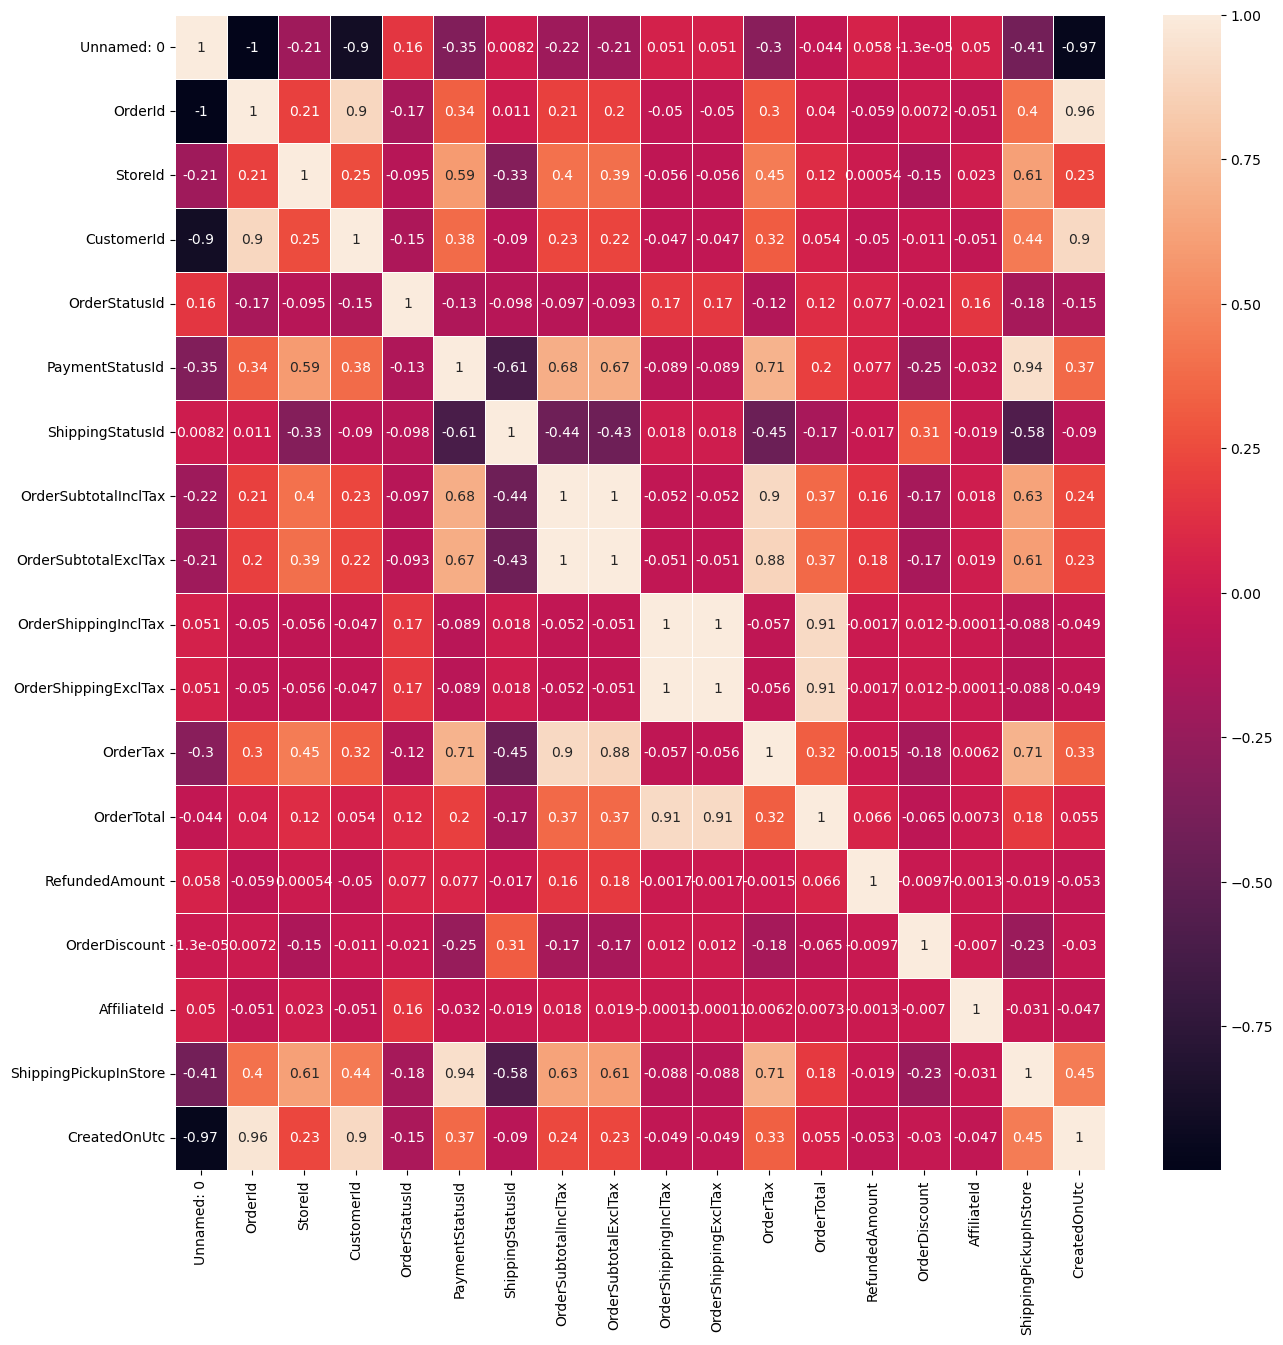

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(corr_matrix, annot=True, linewidths=0.5, ax=ax)
plt.show()

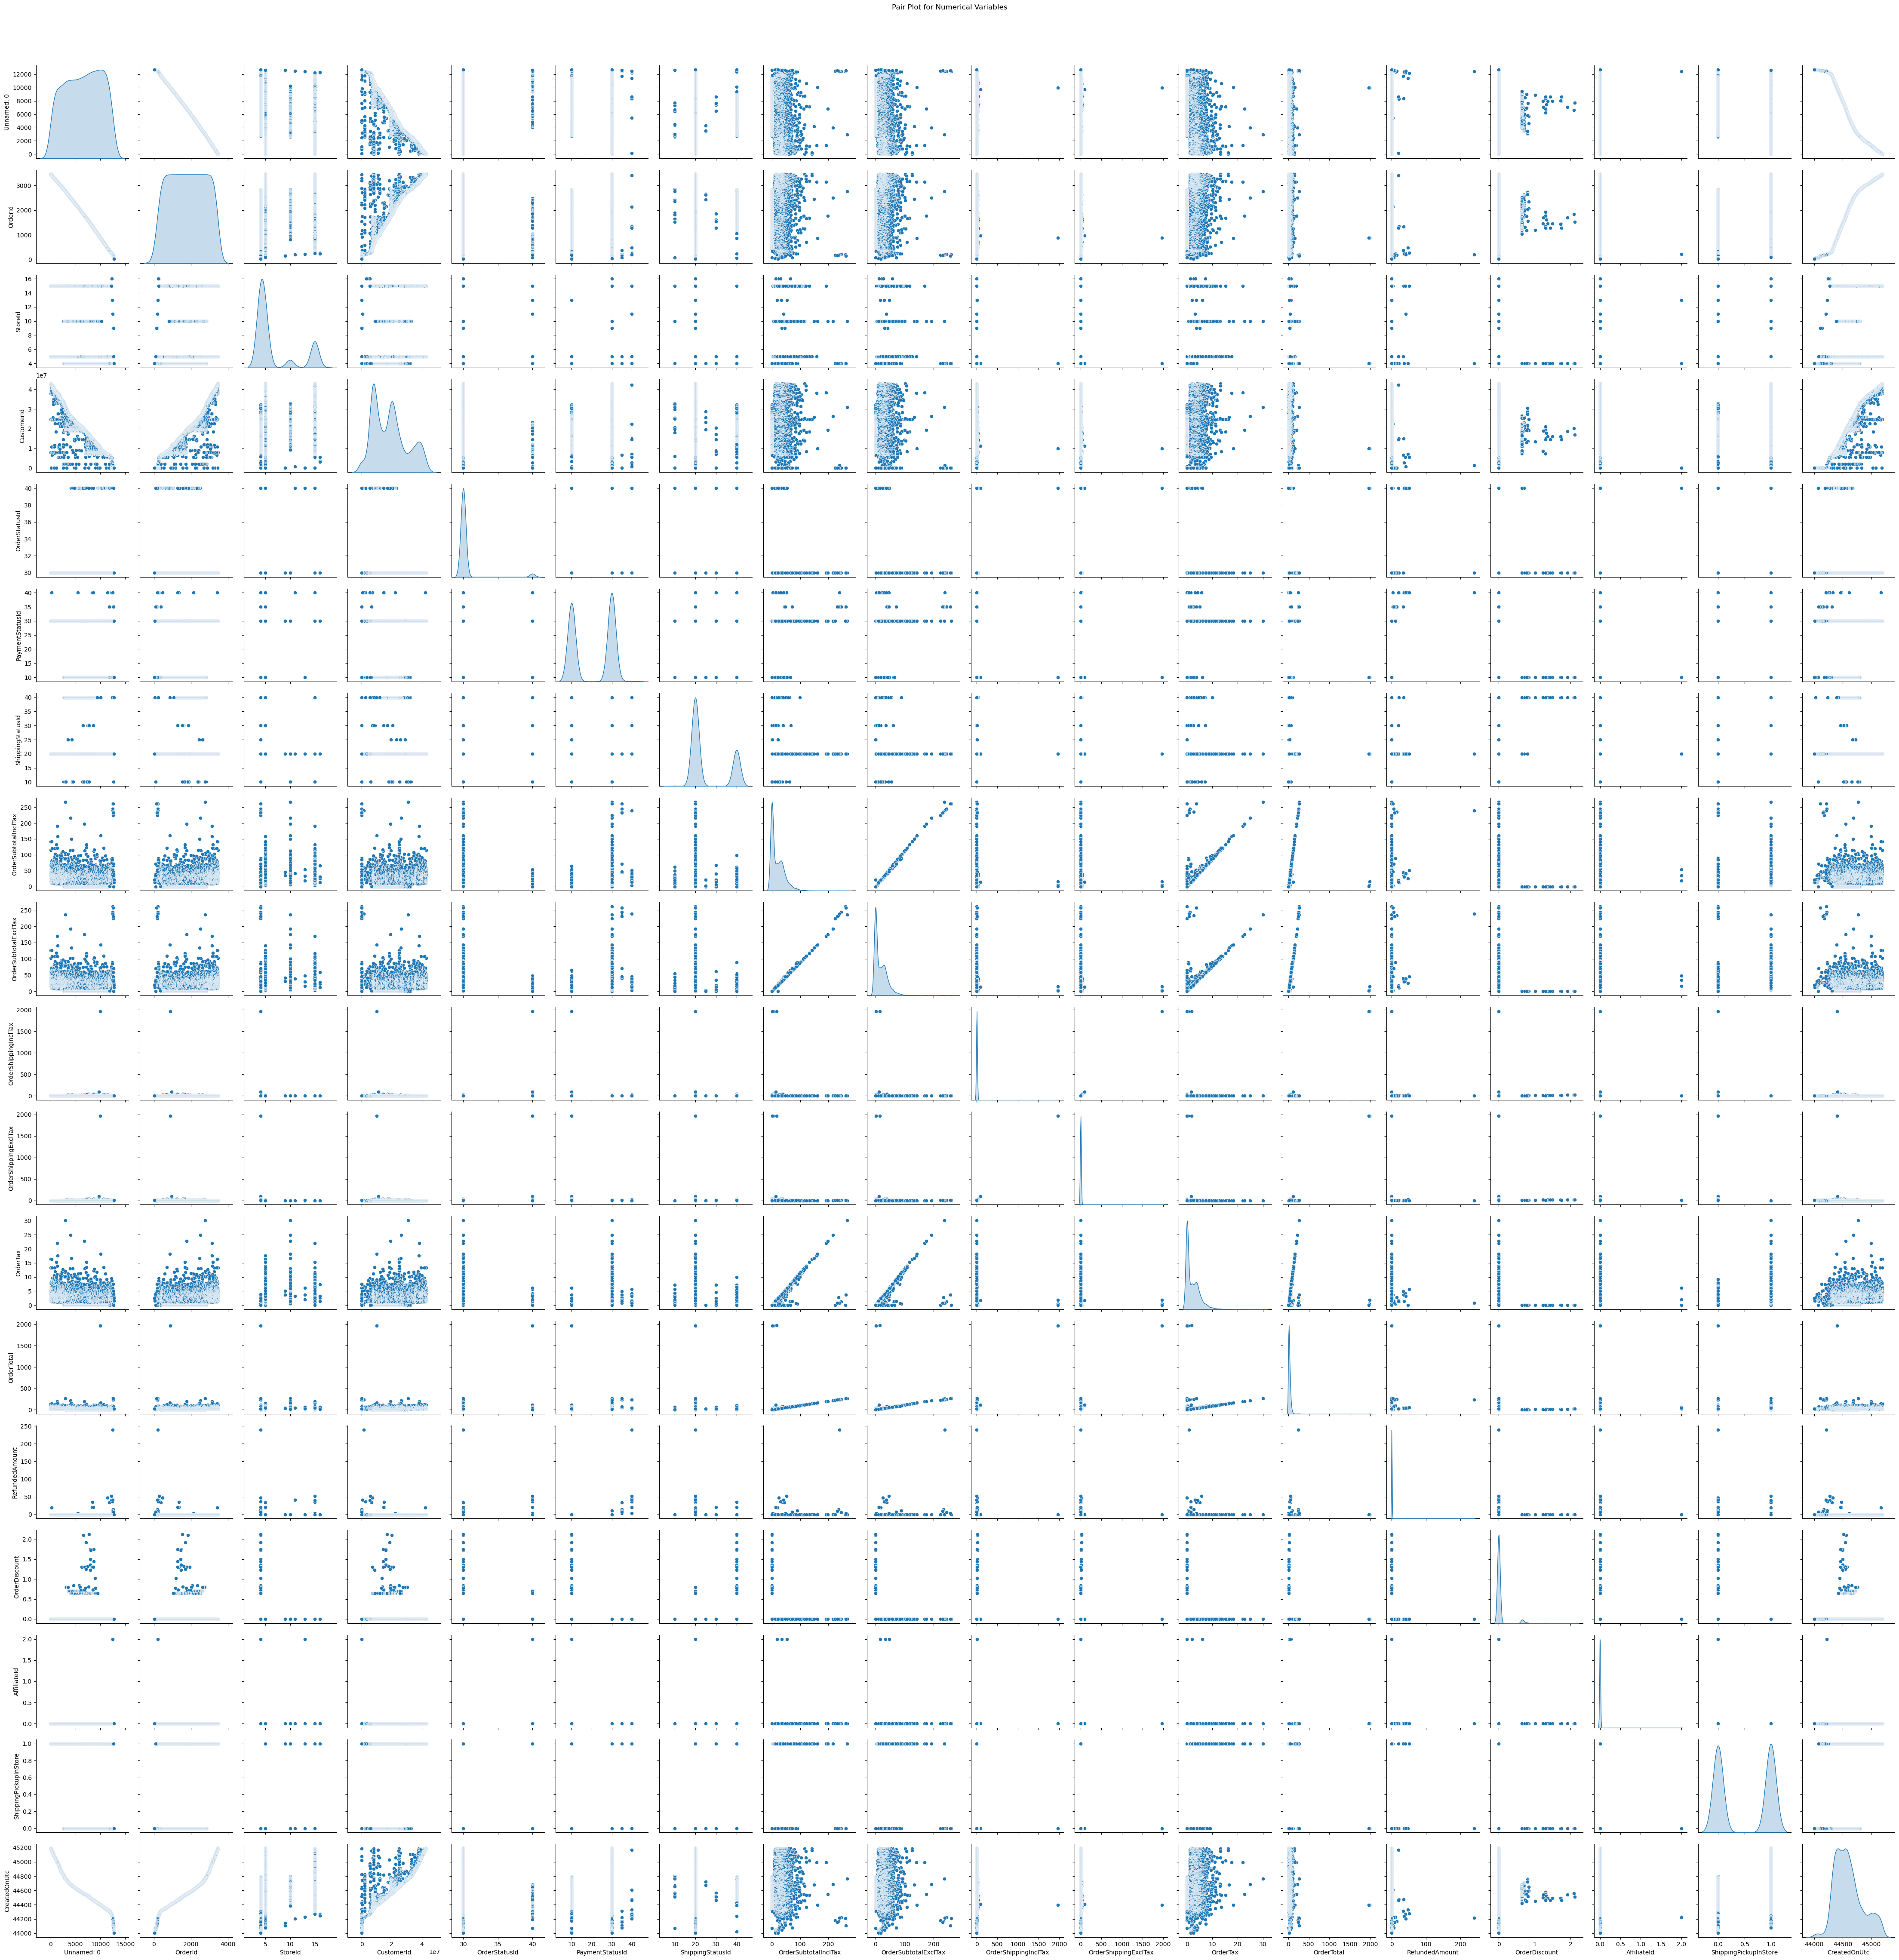

In [39]:
sn.pairplot(data, diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

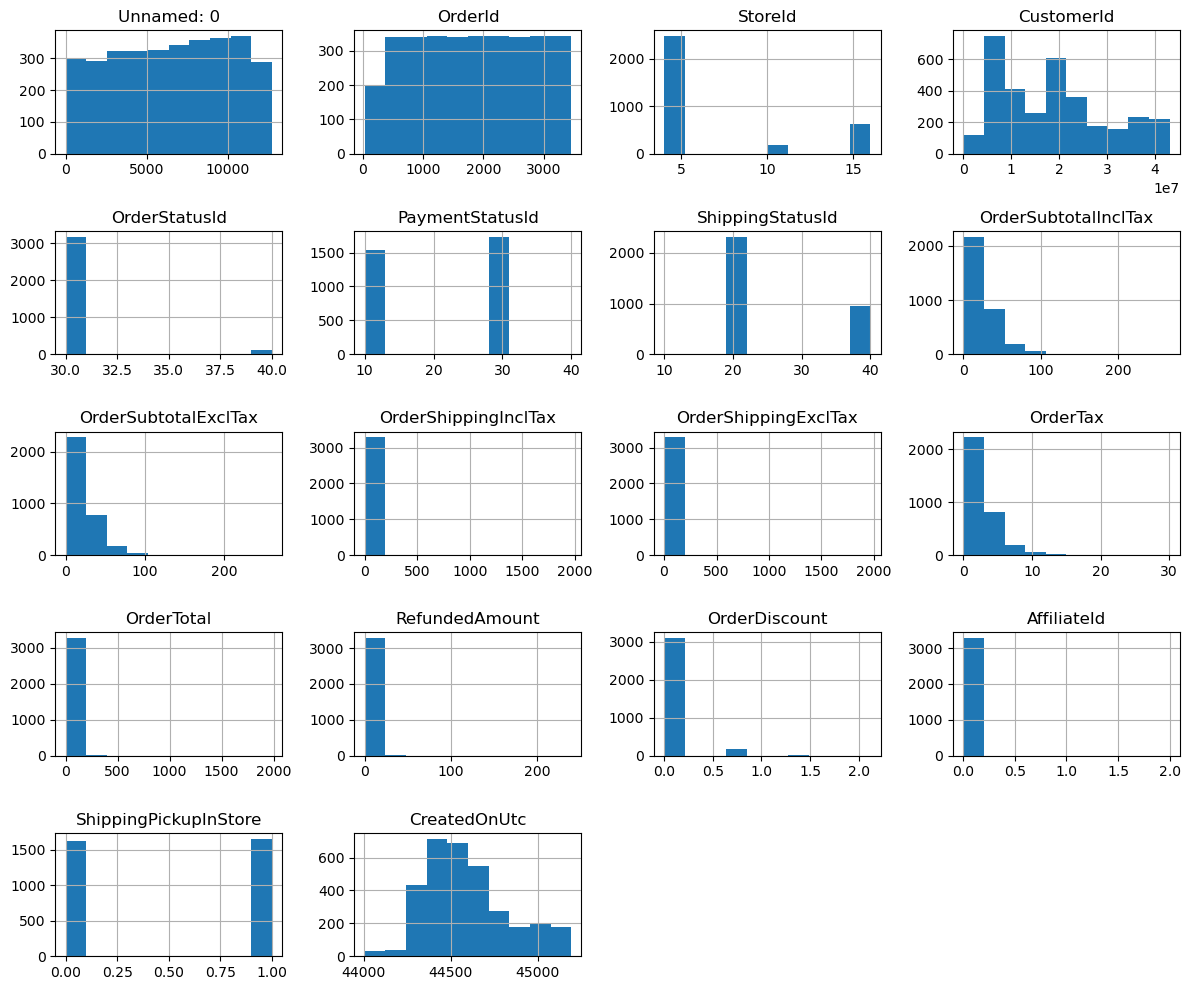

In [40]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

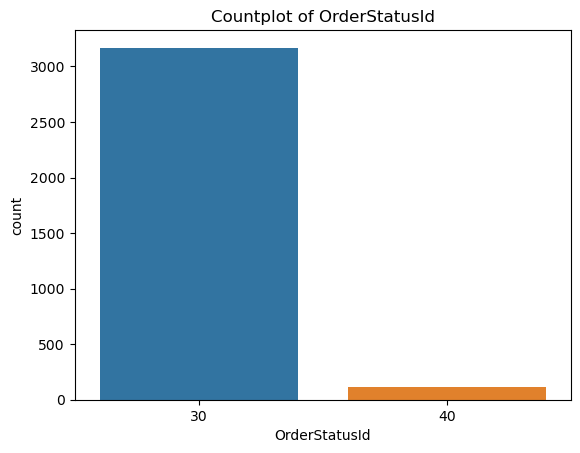

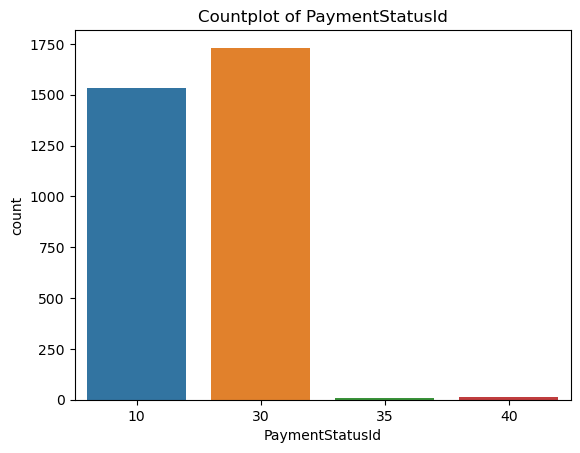

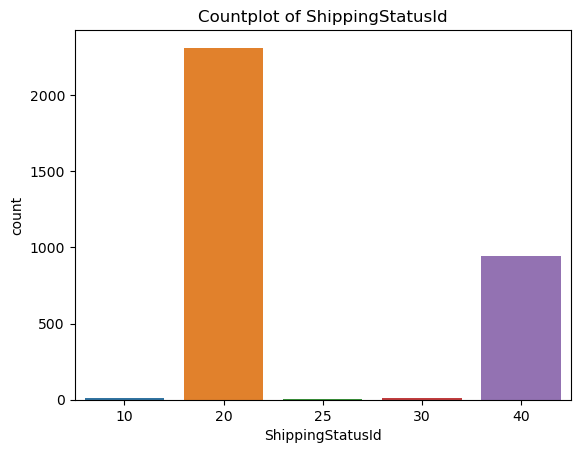

In [41]:
categorical_columns = ['OrderStatusId', 'PaymentStatusId', 'ShippingStatusId']
for column in categorical_columns:
    sn.countplot(x=column, data=data)
    plt.title(f'Countplot of {column}')
    plt.show()

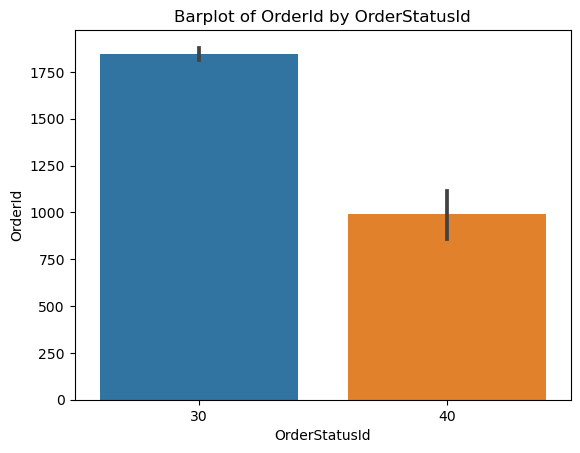

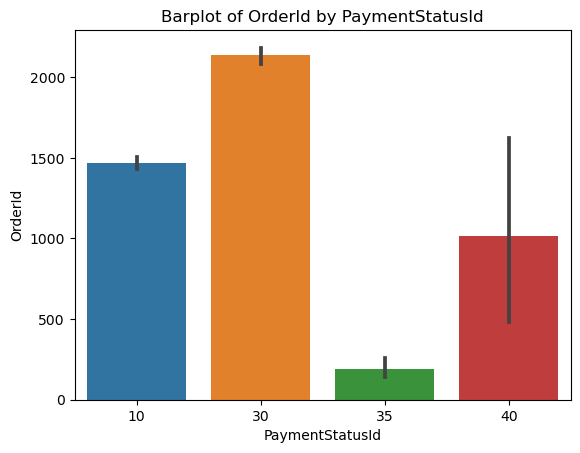

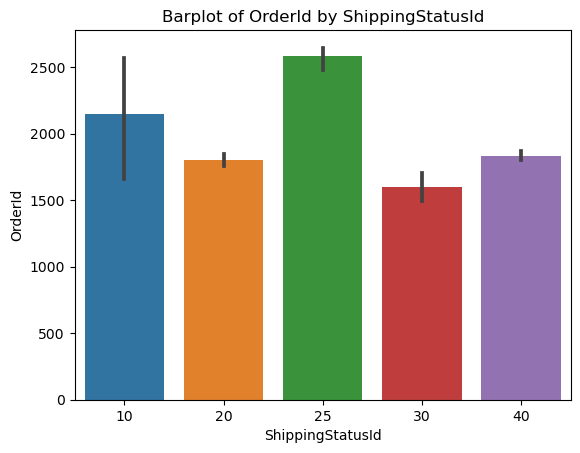

In [42]:
for column in categorical_columns:
    sn.barplot(x=column, y='OrderId', data=data)
    plt.title(f'Barplot of OrderId by {column}')
    plt.show()

In [43]:
import plotly.express as px
fig = px.scatter(data, x='OrderSubtotalInclTax', y='OrderTotal', color='OrderStatusId', hover_data=['CustomerId'])
fig.show()

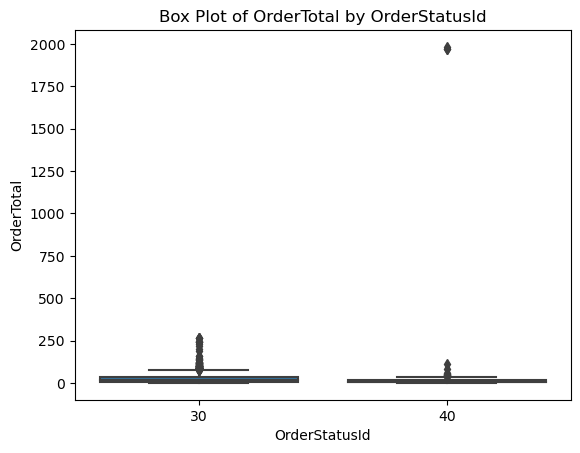

In [44]:
sn.boxplot(x='OrderStatusId', y='OrderTotal', data=data)
plt.title('Box Plot of OrderTotal by OrderStatusId')
plt.show()

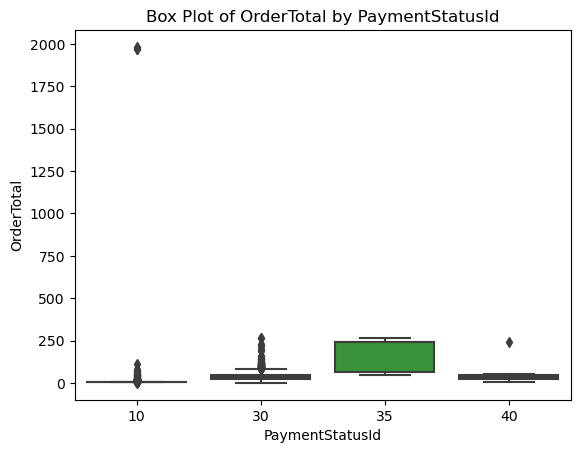

In [45]:
sn.boxplot(x='PaymentStatusId', y='OrderTotal', data=data)
plt.title('Box Plot of OrderTotal by PaymentStatusId')
plt.show()

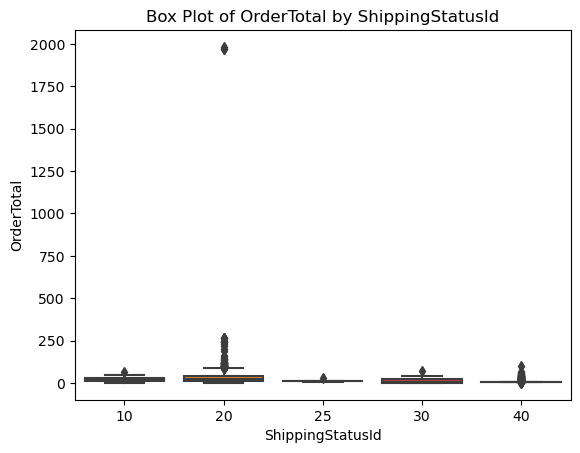

In [46]:
sn.boxplot(x='ShippingStatusId', y='OrderTotal', data=data)
plt.title('Box Plot of OrderTotal by ShippingStatusId')
plt.show()